# Machine Learning Project

### Bin Ware

[GitHub Repository](https://github.com/bware7/datafun-07-applied)

In [23]:
# Standard library imports
import os

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Part 1 - Chart a Straight Line

##### Conversion from Fahrenheit to Celsius

##### The formula for converting Fahrenheit (°F) to Celsius (°C) is:

##### C = (F - 32) × 5/9

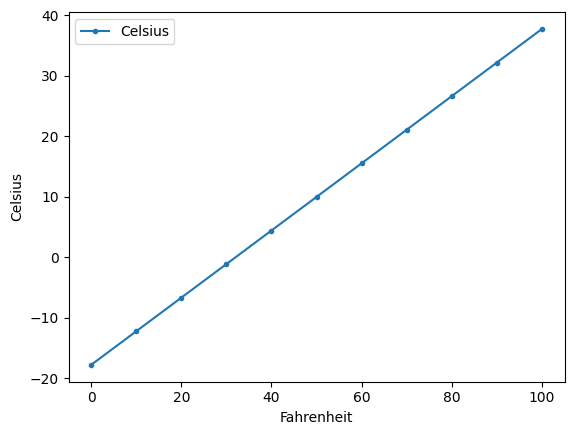

In [24]:
# Defining lambda function for Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Creating a list of Fahrenheit temperatures and converting to Celsius
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Creating a DataFrame with Fahrenheit and Celsius
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plotting the data using pandas DataFrame plot function
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

# Setting y-axis label
y_label = axes.set_ylabel('Celsius')

# Showing the plot
plt.show()

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [25]:
# Load the average high temperature in January for NYC from a CSV file into a DataFrame
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [26]:
# View the first few rows of the dataset
print(nyc_df.head())

# View the last few rows of the dataset
print(nyc_df.tail())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3 - Data Cleaning

In [27]:
# Rename columns for better readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Update the Date column to extract only the year
nyc_df['Date'] = nyc_df['Date'] // 100

### Section 4 - Descriptive Statistics

In [28]:
# Set display precision to 2 decimal places
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics for the dataset
print(nyc_df['Temperature'].describe())

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


### Section 5 - Build the Model

In [29]:
# Calculate slope and intercept for the best-fit line through the data
linear_regression = stats.linregress(x=nyc_df['Date'], y=nyc_df['Temperature'])

slope = linear_regression.slope
intercept = linear_regression.intercept

### Section 6 - Predict

In [30]:
# Predict the average high temperature in January for NYC in the year 2024
predicted_temp_2024 = slope * 2024 + intercept
print(f"Predicted average high temperature in January 2024: {predicted_temp_2024:.2f}°F")

Predicted average high temperature in January 2024: 38.59°F


### Section 7 - Visualizations

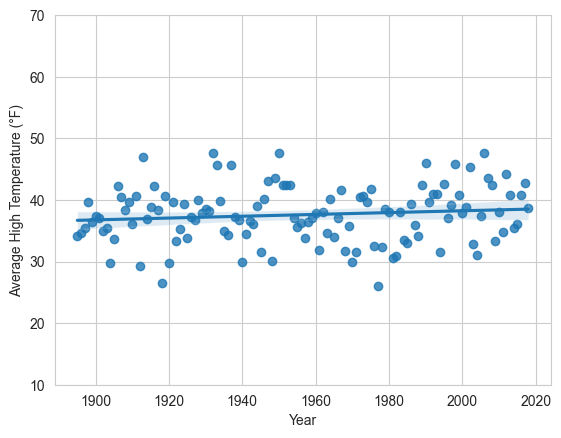

In [31]:
# Set Seaborn style
sns.set_style('whitegrid')

# Generate a scatter plot with the best-fit line
axes = sns.regplot(x=nyc_df['Date'], y=nyc_df['Temperature'])

# Customize the axes and y-scale
axes.set_ylim(10, 70)
axes.set_xlabel('Year')
axes.set_ylabel('Average High Temperature (°F)')

# Show plot
plt.show()